# Quantum One Time Pad

In [25]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.tools.visualization import plot_state_qsphere, plot_histogram

## Initializing message qubits
Specify the number of qubits as $n$. The message qubits can be initialized by entering integer or binary values for $m$ and $hads$ respectively, which apply the following operations:

$m[i] = 1 \implies circuit.x(i)$ <br>
$hads[i] = 1 \implies circuit.h(i)$

To initialize qubits using unitaries other than $X,H$, feel free to modify the $init\_message()$ function or apply the operations on your circuit itself!

In [88]:
def init_message(circuit,n = 1,m = 0,hads = 0):
    if isinstance(m,int):
        m = bin(m)[2:]
    m = m.zfill(n)
    if isinstance(hads,int):
        hads = bin(hads)[2:]
    hads = hads.zfill(n)
    for i in range(0,n):
        if m[i] == '1':
            circuit.x(i)
        if hads[i] == '1':
            circuit.h(i)

## Encryption and Decryption
The Quantum One time pad requires the use of two keys equal in length to the message string. If $k_1, k_2$ are the two keys shared between the sender and receiver, and $|m\rangle = |m_{n-1}\rangle \otimes |m_{n-2}\rangle \otimes ... \otimes |m_1\rangle \otimes |m_0\rangle$

$Enc(|m\rangle,k_1,k_2)[i] = X^{k_1[i]}Z^{k_2[i]}|m_i\rangle = |c_i\rangle$

If $|c\rangle = |c_{n-1}\rangle \otimes |c_{n-2}\rangle \otimes ... \otimes |c_1\rangle \otimes |c_0\rangle$ is the encrypted message or ciphertext, then

$Dec(|c\rangle,k_1,k_2)[i] = Z^{k_2[i]}X^{k_1[i]}|c_i\rangle = |m_i\rangle$

Note that $Dec(|c\rangle,k_1,k_2) = Enc(|m\rangle,k_1,k_2)^{\dagger}$

In [55]:
def encrypt(n,key1 = 0,key2 = 0):
    circuit = QuantumCircuit(n)
    if isinstance(key1,int):
        k1 = bin(key1)[2:]
    k1 = k1.zfill(n)
    if isinstance(key2,int):
        k2 = bin(key2)[2:]
    k2 = k2.zfill(n)
    for i in range(0,n):
        if k1[i] == '1':
            circuit.x(i)
        if k2[i] == '1':
            circuit.z(i)
    return circuit.to_gate()

def decrypt(n,key1 = 0,key2 = 0):
    return encrypt(n,key1,key2).inverse()
    

## Testing the circuits

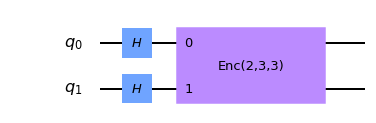

In [90]:
n = 2
k1,k2 = 3,3
m = 0
hads = 3
circuit = QuantumCircuit(n)
init_message(circuit,n,m,hads)
#encryption
enc = encrypt(n,k1,k2)
enc.label = 'Enc({},{},{})'.format(n,k1,k2)
circuit.append(enc,list(range(0,n)))
# #decryption: uncomment to apply
# dec = decrypt(n,k1,k2)
# dec.label = 'Dec({},{},{})'.format(n,k1,k2)
# circuit.append(dec,list(range(0,n)))

%matplotlib inline
circuit.draw(output = 'mpl')
#Uncomment to view contents of the encryption and/or decryption circuits
#circuit.decompose().draw(output = 'mpl')

In [85]:
sv = Statevector.from_label("00")
dm = DensityMatrix(sv)
nsv = sv.evolve(circuit)
ndm = dm.evolve(circuit)
print(nsv.data)
print(ndm.data)

[ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]
[[ 0.25+0.j -0.25+0.j -0.25+0.j  0.25+0.j]
 [-0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j]
 [-0.25+0.j  0.25+0.j  0.25+0.j -0.25+0.j]
 [ 0.25+0.j -0.25+0.j -0.25+0.j  0.25+0.j]]
